In [10]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Importing IsolationForest module
from sklearn.ensemble import IsolationForest

#Importing Line2D for marking legend in graph
from matplotlib.lines import Line2D

#Just to filter out warnings- Well I hate warnings popping on the screen 
import warnings
warnings.filterwarnings("ignore")

#We set the seed for random, so we generate same results whenever we run
np.random.seed(0)

In [18]:
#Now we will generate datasets 

#Generating a normally distributed data set for training
X = 0.3 * np.random.randn(100, 2)
X_train_normal = np.r_[X + 2, X - 2]

#Generating outliers for training
X_train_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

#Generating a normally distributed dataset for testing
X = 0.3 * np.random.randn(20, 2)
X_test_normal = np.r_[X + 2, X - 2]

#Generating outliers for testing
X_test_outliers = np.random.uniform(low=-4, high=4, size=(10, 2))

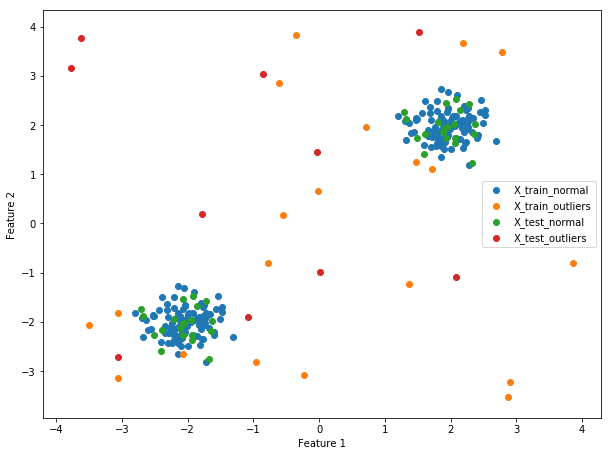

In [19]:
#Plotting and visualising the data points
plt.figure(figsize=(10,7.5))
plt.scatter(X_train_normal[:,0],X_train_normal[:,1],label='X_train_normal')
plt.scatter(X_train_outliers[:,0],X_train_outliers[:,1],label='X_train_outliers')
plt.scatter(X_test_normal[:,0],X_test_normal[:,1],label='X_test_normal')
plt.scatter(X_test_outliers[:,0],X_test_outliers[:,1],label='X_test_outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

In [20]:
#Now we will append the normal points and outliers- train and test separately
X_train=np.append(X_train_normal,X_train_outliers,axis=0)
X_test=np.append(X_test_normal,X_test_outliers,axis=0)

#Training with isolation forest algorithm
clf = IsolationForest(random_state=0, contamination=0.1)
clf.fit(X_train)

#Now we predict the anomaly state for data
y_train=clf.predict(X_train)
y_test=clf.predict(X_test)  

In [21]:
X_train.shape,X_test.shape

((220, 2), (50, 2))

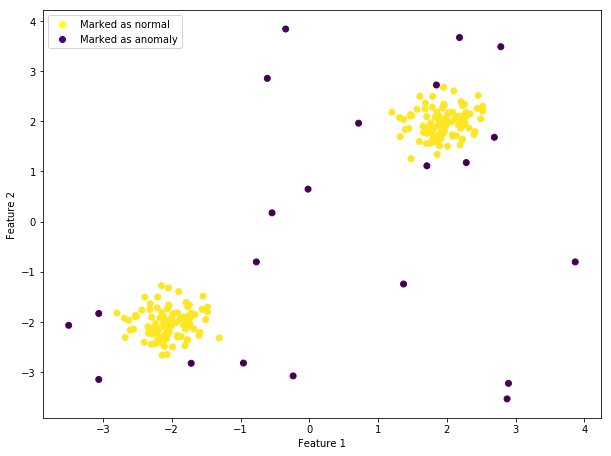

In [22]:
#Now we will plot and visualize how good our algorithm works for training data
#y_train(the state) will mark the colors accordingly
plt.figure(figsize=(10,7.5))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

 
#This is to set the legend appropriately
legend_elements = [Line2D([], [], marker='o', color='yellow', label='Marked as normal',linestyle='None'),
                   Line2D([], [], marker='o', color='indigo', label='Marked as anomaly', linestyle='None')]
plt.legend(handles=legend_elements)

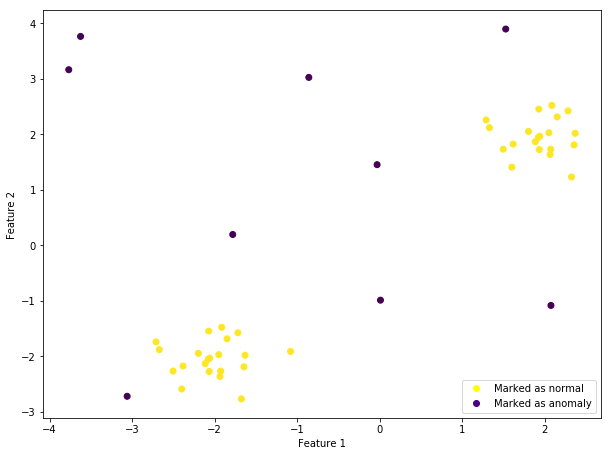

In [23]:
#Now we will do the same for the test data
plt.figure(figsize=(10,7.5))
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

 

legend_elements = [Line2D([], [], marker='o', color='yellow', label='Marked as normal',linestyle='None'),
                   Line2D([], [], marker='o', color='indigo', label='Marked as anomaly', linestyle='None')]
plt.legend(handles=legend_elements)

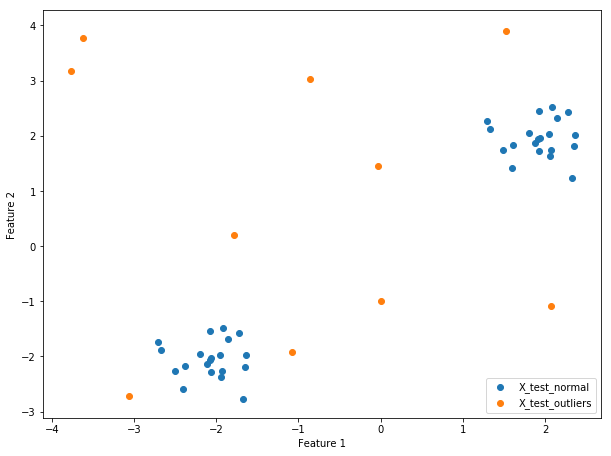

In [24]:
plt.figure(figsize=(10,7.5))
plt.scatter(X_test_normal[:,0],X_test_normal[:,1],label='X_test_normal')
plt.scatter(X_test_outliers[:,0],X_test_outliers[:,1],label='X_test_outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

In [25]:
pwd

'C:\\Users\\Anil'